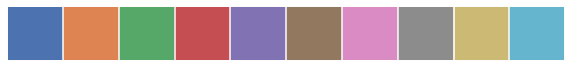

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)
import json
from pandas.io.json import json_normalize
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [2]:
results = {
    'b-resnet' : pd.read_json('../edge_test/nuc_2_jetson_b-resnet.json'),
    'b-densenet' : pd.read_json('../edge_test/nuc_2_jetson_b-densenet.json'),
    'msdnet' : pd.read_json('../edge_test/nuc_2_jetson_msdnet.json')
}

In [110]:
results['b-densenet'].loc[results['b-densenet']['sample'] == 9]

,sample,exit,prediction,scores,target,overall time,prediction time,tx time,rx time,preprocess time,correct,index_top5
36,9,0,"[92, 0, 65, 36, 70]","[0.9306590557098381, 0.050956796854734004, 0.0...",0,77.253454,10.523153,3.956921,22.562121,3.84245,False,1
37,9,1,"[0, 92, 65, 42, 60]","[0.464566111564636, 0.46438759565353305, 0.068...",0,77.337047,14.561092,3.956921,22.562121,3.84245,True,0
38,9,2,"[0, 65, 92, 13, 60]","[0.9982294440269471, 0.001399657572619, 0.0003...",0,77.399571,25.476631,3.956921,22.562121,3.84245,True,0
39,9,3,"[0, 65, 60, 92, 13]","[0.9992089867591851, 0.00034707033773800005, 0...",0,92.155576,17.976788,3.956921,22.562121,3.84245,True,0


top-5 accuracy

In [4]:
top5  = { x : np.array(results[x].loc[(results[x]['index_top5'] != -1)].groupby('exit').count()['index_top5'].tolist()) / 5000 for x in results }
top5

{'b-resnet': array([0.738 , 0.8792, 0.9648, 0.9696]),
 'b-densenet': array([0.7862, 0.917 , 0.9452, 0.965 ]),
 'msdnet': array([0.896 , 0.9422, 0.953 , 0.959 ])}

In [5]:
top1 = {x : np.array(results[x].loc[(results[x]['correct'] == True)].groupby('exit').count()['correct'].tolist()) / 5000 for x in results }
top1

{'b-resnet': array([0.4394, 0.6684, 0.8698, 0.8826]),
 'b-densenet': array([0.5114, 0.7452, 0.8292, 0.866 ]),
 'msdnet': array([0.7076, 0.81  , 0.844 , 0.8594])}

In [6]:
combined_top5 = {}
for net in results:
    one_is_right = np.zeros(4)
    for _, d in results[net].groupby('sample'):
        idx = d.index_top5.tolist()
        for n in range(len(idx),0,-1):
            if all(i == -1 for i in idx[:n]):
                one_is_right[n-1] +=1 
    combined_top5[net] = (5000 - one_is_right) / 5000
combined_top5

{'b-resnet': array([0.738 , 0.8948, 0.9762, 0.9824]),
 'b-densenet': array([0.7862, 0.9344, 0.967 , 0.978 ]),
 'msdnet': array([0.896 , 0.9546, 0.9702, 0.977 ])}

In [7]:
combined_top1 = {}
for net in results:
    one_is_right = np.zeros(4)
    for _, d in results[net].groupby('sample'):
        if any(i==0 for i in d.index_top5.tolist()):
            one_is_right += 1
    combined_top1[net] = one_is_right / 5000
combined_top1

{'b-resnet': array([0.9152, 0.9152, 0.9152, 0.9152]),
 'b-densenet': array([0.9132, 0.9132, 0.9132, 0.9132]),
 'msdnet': array([0.9076, 0.9076, 0.9076, 0.9076])}

In [109]:
exit_wronged = {
    'exit-{}'.format(x) : {
        'count' : 0,
        'samples' : [],
        'overturned by': []
    } for x in range(4)
}
list_of_samples = []
for i, d in results['b-densenet'].groupby('sample'):
    correct = np.array(d.correct.tolist())
    scores = np.array(d.scores.tolist())[:,0]

    for j in range(3):
        if correct[j] == True and correct[j+1:].any() == False and scores[j+1:].any() > scores[j]:
            for p in p.delete(correct)
            print(i,j)
            exit_wronged['exit-{}'.format(j)]['samples'].append(i)
            exit_wronged['exit-{}'.format(j)]['count'] += 1

6 0 0 (False, 0.7619500160217281)
6 3 1 (False, 0.7619500160217281)
9 1 0 (False, 0.9306590557098381)
29 3 1 (False, 0.6601902246475221)
29 3 2 (False, 0.7377485632896421)
51 3 2 (False, 0.9637895226478571)
52 3 2 (False, 0.46139231324195806)
54 3 1 (False, 0.2969970703125)
54 3 2 (False, 0.7919368743896481)
71 0 1 (False, 0.7282440662384031)
71 0 2 (False, 0.9229400157928461)
73 1 1 (False, 0.649735689163208)
77 2 0 (False, 0.535133481025695)
83 0 1 (False, 0.338262408971786)
91 0 0 (False, 0.652568101882934)
91 0 2 (False, 0.6401568651199341)
91 2 1 (False, 0.652568101882934)
91 2 2 (False, 0.6401568651199341)
92 0 0 (False, 0.47554811835289)
98 0 0 (False, 0.5200569629669191)
101 1 1 (False, 0.584863483905792)
107 3 2 (False, 0.746356129646301)
108 0 1 (False, 0.635777354240417)
108 1 1 (False, 0.635777354240417)
113 0 0 (False, 0.5593043565750121)
116 3 2 (False, 0.9603103995323181)
117 2 0 (False, 0.52300626039505)
117 2 2 (False, 0.8381220102310181)
125 0 1 (False, 0.895242094993

1445 2 1 (False, 0.8305332660675041)
1445 2 2 (False, 0.9375969767570491)
1448 3 1 (False, 0.44561892747879006)
1486 0 2 (False, 0.987847089767456)
1486 1 2 (False, 0.987847089767456)
1486 2 2 (False, 0.987847089767456)
1489 0 1 (False, 0.5750404596328731)
1489 0 2 (False, 0.9769454002380371)
1489 1 2 (False, 0.9769454002380371)
1504 2 1 (False, 0.37391176819801303)
1504 2 2 (False, 0.548536002635955)
1505 3 2 (False, 0.641983807086944)
1513 1 1 (False, 0.762450754642486)
1513 1 2 (False, 0.9326685070991511)
1514 1 0 (False, 0.32433319091796803)
1531 0 1 (False, 0.971567928791046)
1531 0 2 (False, 0.97159743309021)
1564 0 0 (False, 0.618651270866394)
1569 3 0 (False, 0.8674901723861691)
1574 2 0 (False, 0.6301143169403071)
1574 2 1 (False, 0.9580768942832941)
1574 3 1 (False, 0.9580768942832941)
1612 0 1 (False, 0.629421472549438)
1641 0 0 (False, 0.7158038616180421)
1657 1 1 (False, 0.6318446397781371)
1657 1 2 (False, 0.9864164590835571)
1669 2 1 (False, 0.9706351161003111)
1669 3 1 

2681 0 1 (False, 0.9059699773788451)
2681 1 1 (False, 0.9059699773788451)
2681 3 2 (False, 0.9059699773788451)
2683 1 0 (False, 0.649966120719909)
2683 2 0 (False, 0.649966120719909)
2691 2 1 (False, 0.29553097486495905)
2695 1 0 (False, 0.8401606678962701)
2700 2 1 (False, 0.9397426247596741)
2700 3 1 (False, 0.9397426247596741)
2704 3 2 (False, 0.7614667415618891)
2706 0 1 (False, 0.688795089721679)
2706 0 2 (False, 0.986232757568359)
2710 0 0 (False, 0.35894972085952703)
2710 0 1 (False, 0.860553562641143)
2710 0 2 (False, 0.648464143276214)
2712 1 1 (False, 0.534326374530792)
2718 1 1 (False, 0.9315334558486931)
2718 1 2 (False, 0.8010061383247371)
2739 1 0 (False, 0.761956095695495)
2749 2 1 (False, 0.48358133435249306)
2749 2 2 (False, 0.9585770964622491)
2750 2 2 (False, 0.41562780737876803)
2763 0 0 (False, 0.9816516637802121)
2763 0 1 (False, 0.999954938888549)
2763 0 2 (False, 0.9899016618728631)
2764 3 1 (False, 0.5282962322235101)
2773 1 1 (False, 0.998512327671051)
2773 1 

4006 0 2 (False, 0.512139201164245)
4033 0 0 (False, 0.8961768746376031)
4041 0 1 (False, 0.9110910296440121)
4042 3 0 (False, 0.9419419169425961)
4043 2 0 (False, 0.7156161665916441)
4043 2 1 (False, 0.8480173349380491)
4043 2 2 (False, 0.874067246913909)
4047 1 0 (False, 0.648500561714172)
4052 1 0 (False, 0.447419196367263)
4091 1 0 (False, 0.517683088779449)
4091 1 1 (False, 0.45397838950157104)
4091 1 2 (False, 0.459182173013687)
4093 3 1 (False, 0.9046969413757321)
4093 3 2 (False, 0.8012483716011041)
4096 2 0 (False, 0.27538713812828003)
4096 2 1 (False, 0.44891068339347806)
4104 1 0 (False, 0.791302919387817)
4104 1 1 (False, 0.8085727691650391)
4104 3 0 (False, 0.791302919387817)
4104 3 2 (False, 0.8085727691650391)
4105 3 1 (False, 0.984457552433013)
4109 2 1 (False, 0.6467655301094051)
4113 0 0 (False, 0.7316924333572381)
4114 0 1 (False, 0.8223112821578981)
4114 0 2 (False, 0.6477504968643181)
4114 1 1 (False, 0.8223112821578981)
4114 1 2 (False, 0.6477504968643181)
4115 1 

In [86]:
exit_wronged

{'exit-0': {'count': 48,
  'samples': [125,
   551,
   759,
   1127,
   1156,
   1203,
   1345,
   1350,
   1358,
   1531,
   1751,
   1858,
   1869,
   2131,
   2132,
   2166,
   2268,
   2286,
   2518,
   2545,
   2602,
   2612,
   2706,
   2710,
   2763,
   2810,
   2861,
   2892,
   2974,
   3304,
   3342,
   3345,
   3346,
   3391,
   3406,
   3456,
   3461,
   3566,
   3591,
   4136,
   4292,
   4317,
   4484,
   4499,
   4522,
   4561,
   4650,
   4964],
  'overturned by': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1]},
 'exit-1': {'count': 82,
  'samples': [71,
   73,
   256,
   336,
   541,
   545,
   597,
   728,
   766,
   828,
   870,
   940,
   1001,
   1036,
   1077,
   1117,
   1131,
   1199,
   1240,
   1369,
   1387,
   1396,
   1489

In [54]:
list_of_samples

[220    55
 221    55
 222    55
 223    55
 Name: sample, dtype: int64, 284    71
 285    71
 286    71
 287    71
 Name: sample, dtype: int64, 292    73
 293    73
 294    73
 295    73
 Name: sample, dtype: int64, 364    91
 365    91
 366    91
 367    91
 Name: sample, dtype: int64, 468    117
 469    117
 470    117
 471    117
 Name: sample, dtype: int64, 500    125
 501    125
 502    125
 503    125
 Name: sample, dtype: int64, 624    156
 625    156
 626    156
 627    156
 Name: sample, dtype: int64, 908    227
 909    227
 910    227
 911    227
 Name: sample, dtype: int64, 1024    256
 1025    256
 1026    256
 1027    256
 Name: sample, dtype: int64, 1272    318
 1273    318
 1274    318
 1275    318
 Name: sample, dtype: int64, 1344    336
 1345    336
 1346    336
 1347    336
 Name: sample, dtype: int64, 1852    463
 1853    463
 1854    463
 1855    463
 Name: sample, dtype: int64, 1984    496
 1985    496
 1986    496
 1987    496
 Name: sample, dtype: int64, 2164   

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Exit-#')]

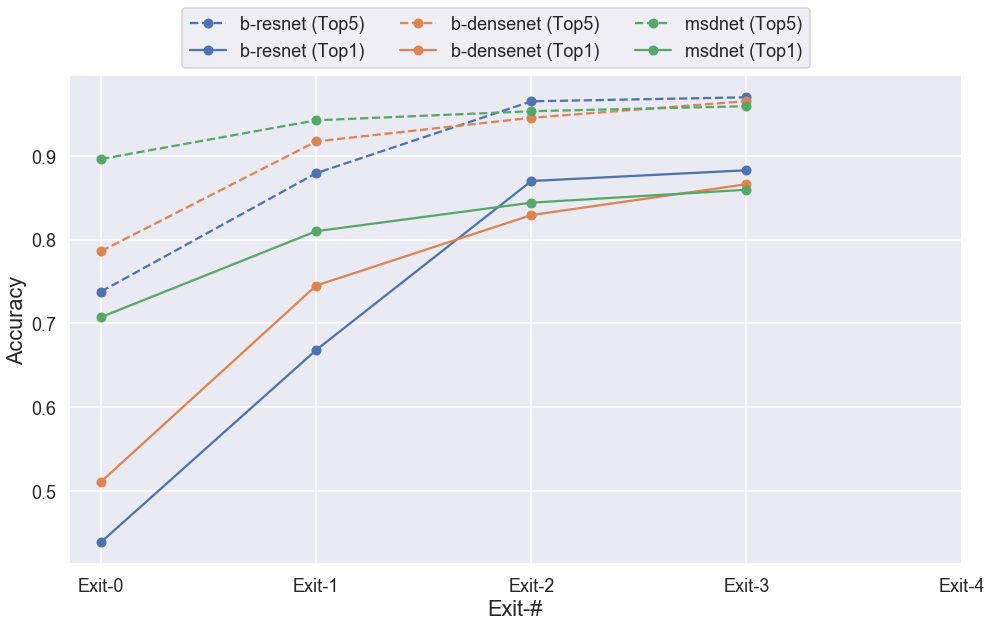

In [17]:
fig, ax = plt.subplots(1,1)
x = np.arange(5)
for i, net in enumerate(results):
    ax.plot(top5[net], '--o', color=current_palette[i])
    ax.plot(top1[net], '-o', color=current_palette[i])
    
    
ax.set_xticks(x)
ax.set_xticklabels(['Exit-{}'.format(x) for x in range(5)])
fig.legend([val for sublist in [['{} (Top5)'.format(x) ]+ ['{} (Top1)'.format(x)] for x in results] for val in sublist], 
           ncol=3, loc="upper center", fontsize='medium')

ax.set(xlabel='Exit-#', ylabel='Accuracy')

In [9]:
[['Top1-{}'.format(x)] + ['Top5-{}'.format(x) ]for x in results]


[['Top1-b-resnet', 'Top5-b-resnet'],
 ['Top1-b-densenet', 'Top5-b-densenet'],
 ['Top1-msdnet', 'Top5-msdnet']]

In [10]:
nets = { net : {} for net in results}
for net in results:
    best_exit = np.zeros(4)
    best_score = np.zeros((4,4))
    highscore_incorrect = np.zeros((4,4))
    highscore_correct = np.zeros((4,4))
    worst_mistaken = np.zeros(4)
    for i, d in results[net].groupby('sample'):
        #tmp = d[np.argmax(d.scores.tolist()[0]):1]
        correct = np.array(d.correct.tolist())
        scores = np.array(d.scores.tolist())
        
        
#for n, c in enumerate(correct):
        for n in range(len(correct),0,-1):
            #print(n)
            correct = correct[:n]
            scores = scores[:,:n]
            e_highscore = np.argmax(scores) // 4
            #print(scores)
            
            best_score[n-1][e_highscore] +=1
        
            if correct[e_highscore] == False:
                #print(e_highscore)
                highscore_incorrect[n-1][e_highscore] += 1
            else:
                #print(e_highscore)
                highscore_correct[n-1][e_highscore] += 1 
        #worst_mistaken[combined_incorrect] +=1

    nets[net]['best exit scoring'] = best_score
    nets[net]['best score exit incorrect'] = highscore_incorrect
    nets[net]['best score exit correct'] = highscore_correct
nets

{'b-resnet': {'best exit scoring': array([[5000.,    0.,    0.,    0.],
         [ 171., 4829.,    0.,    0.],
         [ 171., 1392., 3437.,    0.],
         [  29.,  142., 1392., 3437.]]),
  'best score exit incorrect': array([[2803.,    0.,    0.,    0.],
         [ 100., 1576.,    0.,    0.],
         [ 100.,  407.,  383.,    0.],
         [  18.,   66.,  182.,  337.]]),
  'best score exit correct': array([[2197.,    0.,    0.,    0.],
         [  71., 3253.,    0.,    0.],
         [  71.,  985., 3054.,    0.],
         [  11.,   76., 1210., 3100.]])},
 'b-densenet': {'best exit scoring': array([[5000.,    0.,    0.,    0.],
         [ 424., 4576.,    0.,    0.],
         [ 424., 2103., 2473.,    0.],
         [  41.,  383., 2103., 2473.]]),
  'best score exit incorrect': array([[2443.,    0.,    0.,    0.],
         [ 211., 1122.,    0.,    0.],
         [ 211.,  400.,  430.,    0.],
         [  34.,  121.,  261.,  283.]]),
  'best score exit correct': array([[2557.,    0.,    0.

In [11]:
nets[net]['best score exit incorrect']

array([[1462.,    0.,    0.,    0.],
       [ 387.,  634.,    0.,    0.],
       [ 387.,  258.,  262.,    0.],
       [ 159.,  160.,  198.,  221.]])

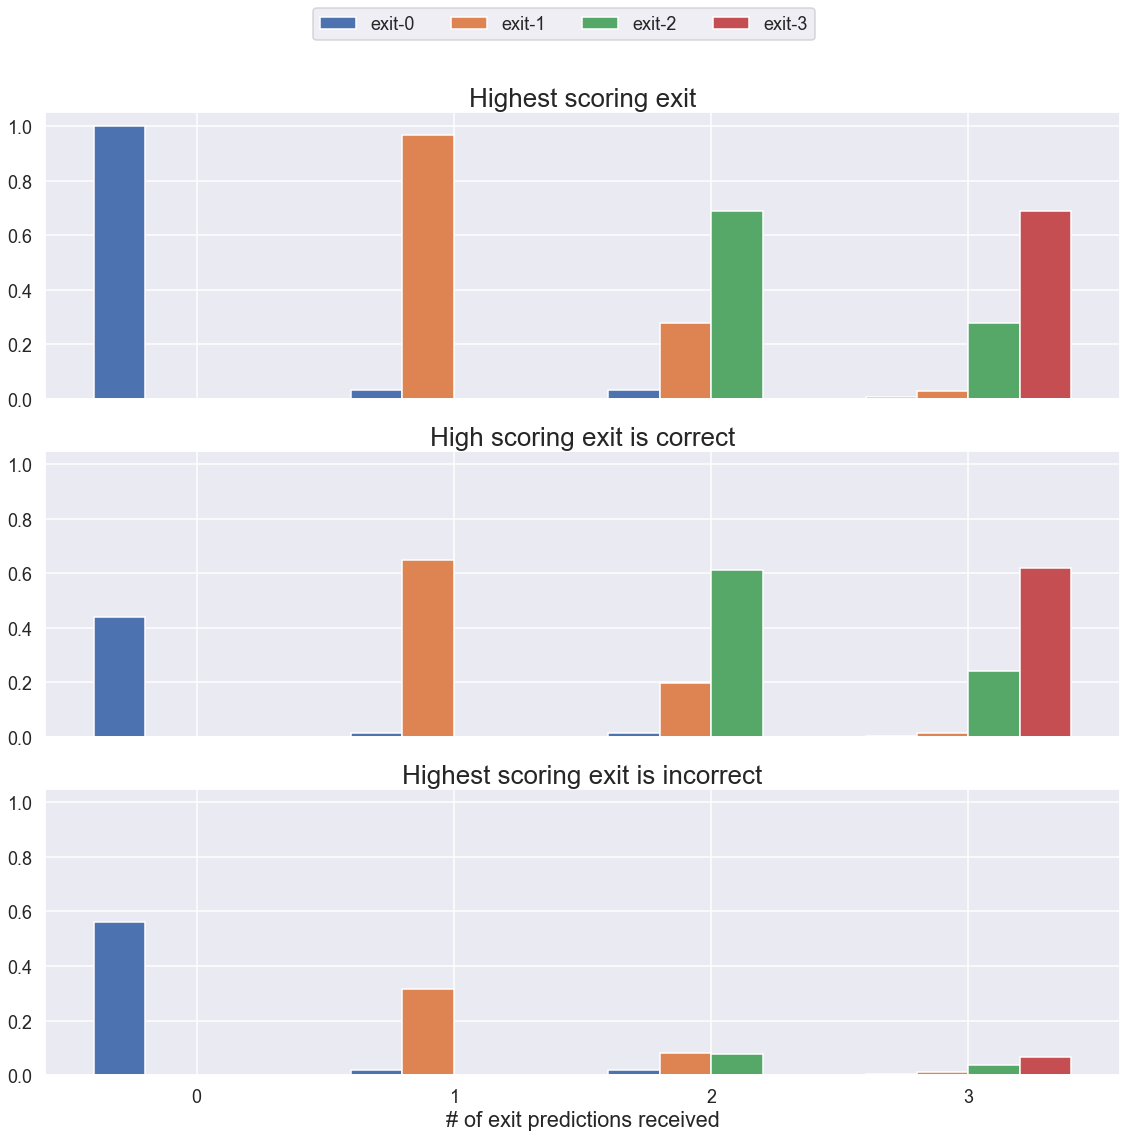

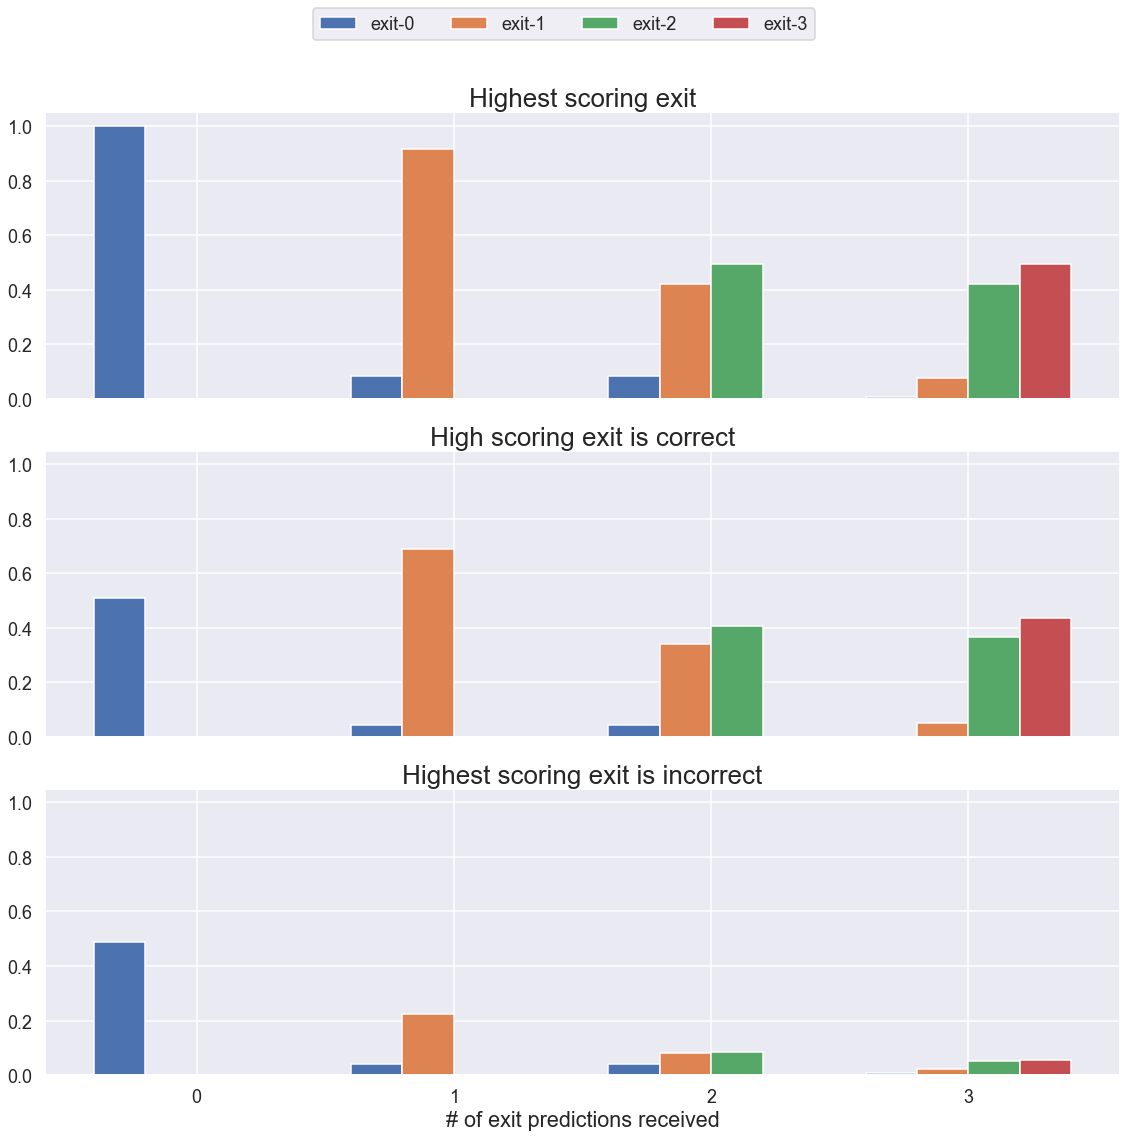

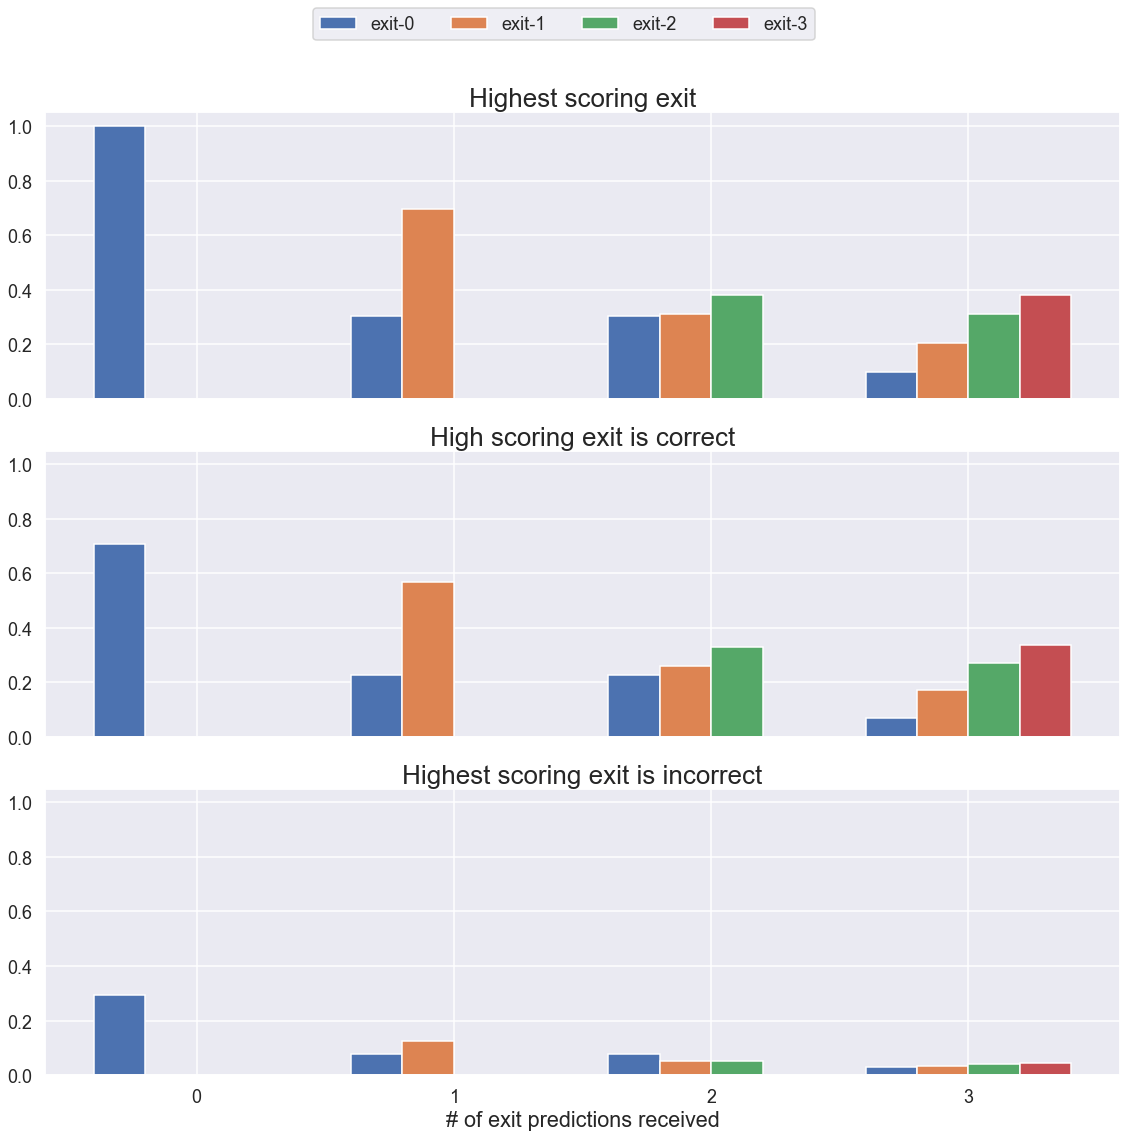

In [16]:
for net in nets:
    fig, axes = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,16))
    x = np.arange(4)
    width = 0.2
    #ax.bar(x-width, best_exit, width=width)
    #ax.bar(x, best_score, width=width)
    #ax.bar(x+width, score_correct, width=width)
    for index_offset, exit_n in zip([-1.5,-.5,.5,1.5], range(4)):
        axes[0].bar(x+(width*index_offset), nets[net]['best exit scoring'].T[exit_n] /5000, width=width)
        axes[1].bar(x+(width*index_offset), nets[net]['best score exit correct'].T[exit_n] /5000, width=width)
        axes[2].bar(x+(width*index_offset), nets[net]['best score exit incorrect'].T[exit_n] /5000, width=width)

    for ax, title in zip(axes.flat, ['Highest scoring exit', 'High scoring exit is correct', 'Highest scoring exit is incorrect']):
        ax.set_xticks(x)
        ax.set_title(title)
        ax.set_xlabel('# of exit predictions received')
        ax.label_outer()
        #ax.set_xticklabels(label for label in nets[net])

    fig.legend(['exit-{}'.format(x) for x in range(4)], ncol=4, loc="upper center", fontsize='medium')
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.savefig(net + '_correctness.png')